<a href="https://colab.research.google.com/github/Sangeetha-maker/AI-Powered-Language-Translator-using-Machine-Learning/blob/main/Neurocare(non_demented).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
uploaded_files=files.upload()

Saving 00a9c4ad-c06d-431d-a5c9-1dc324db0632.jpg to 00a9c4ad-c06d-431d-a5c9-1dc324db0632 (1).jpg
Saving 00a98422-8b63-47e6-8b8f-9119984d87ee.jpg to 00a98422-8b63-47e6-8b8f-9119984d87ee (1).jpg
Saving 00aca345-1ef7-4fa9-9b3a-0c4c58f71fd1.jpg to 00aca345-1ef7-4fa9-9b3a-0c4c58f71fd1 (2).jpg
Saving 00b6998c-266a-4880-b6af-30ca013bdd8c.jpg to 00b6998c-266a-4880-b6af-30ca013bdd8c (1).jpg
Saving 00b8529f-23c6-415c-96cc-a4e6ca6ed6ac.jpg to 00b8529f-23c6-415c-96cc-a4e6ca6ed6ac (1).jpg
Saving 00bf1de7-3fa1-4027-8d9c-b44224391c7d.jpg to 00bf1de7-3fa1-4027-8d9c-b44224391c7d (2).jpg
Saving 00c69c46-4fce-42e2-94d6-f5f39c802c5a.jpg to 00c69c46-4fce-42e2-94d6-f5f39c802c5a (2).jpg
Saving 00d1d847-c16b-4d89-a6da-a7d4e2764ef4.jpg to 00d1d847-c16b-4d89-a6da-a7d4e2764ef4 (2).jpg
Saving 00d2a7e6-2093-40ea-afd9-3c839dabb778.jpg to 00d2a7e6-2093-40ea-afd9-3c839dabb778 (2).jpg
Saving 00d286e4-7081-4900-a114-c4592d141bf7.jpg to 00d286e4-7081-4900-a114-c4592d141bf7 (2).jpg


In [ ]:
# Assuming you want to store data related to this image in a folder
# Extract the image name without the extension
image_name = os.path.splitext(os.path.basename(DATASET_PATH))[0]

# Create a folder with the image name
DATASET_PATH = os.path.join("/content", image_name)
os.makedirs(DATASET_PATH, exist_ok=True)

# Now you can use DATASET_PATH to store related files

In [ ]:
for filename in uploaded_files.keys():
    with open(os.path.join(DATASET_PATH, filename), "wb") as f:
        f.write(uploaded_files[filename])

In [ ]:
print("Images uploaded successfully!")

Images uploaded successfully!


In [ ]:
IMG_SIZE = 150

def load_images():
    data, labels = [], []
    for img_name in os.listdir(DATASET_PATH):
        img_path = os.path.join(DATASET_PATH, img_name)
        try:
            img_array = cv2.imread(img_path)
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append(img_array)
            labels.append(0)  # All images are "NonDemented"
        except Exception as e:
            print("Error loading image:", e)

    return np.array(data), np.array(labels)

In [ ]:
X, y = load_images()

In [ ]:
X = X / 255.0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Loaded {len(X_train)} train samples, {len(X_test)} test samples")

Loaded 8 train samples, 2 test samples


In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.7500 - loss: 0.6720 - val_accuracy: 1.0000 - val_loss: 0.0120
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - accuracy: 1.0000 - loss: 0.0175 - val_accuracy: 1.0000 - val_loss: 3.5792e-05
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 1.0000 - loss: 6.6780e-05 - val_accuracy: 1.0000 - val_loss: 4.4824e-08
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step - accuracy: 1.0000 - loss: 5.6630e-08 - val_accuracy: 1.0000 - val_loss: 2.9993e-11
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step - accuracy: 1.0000 - loss: 4.6141e-10 - val_accuracy: 1.0000 - val_loss: 1.2897e-14
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - accuracy: 1.0000 - loss: 1.0952e-11 - val_accuracy: 1.0000 - val_loss: 4.2354e-18
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - accuracy: 1.0000 - loss: 1.5774e-17 - val_accuracy: 1.0000 - val_loss: 1.2287e-21
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 1.0000 - loss: 

In [ ]:
model.save('alzheimer_model_nondemented.h5')
print("Model saved successfully!")

Model saved successfully!


Saving 0ad394c1-32fe-4e0e-86d9-abe4d671ff0a.jpg to 0ad394c1-32fe-4e0e-86d9-abe4d671ff0a.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


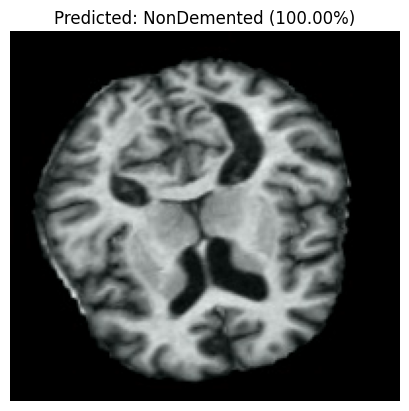

In [ ]:
from IPython.display import display
import matplotlib.pyplot as plt

def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Expand dimensions for model

    prediction = model.predict(img)[0][0]
    predicted_class = "NonDemented" if prediction < 0.5 else "Demented"
    confidence = prediction if predicted_class == "Demented" else 1 - prediction

    # Display image
    plt.imshow(cv2.imread(image_path))
    plt.axis("off")
    plt.title(f"Predicted: {predicted_class} ({confidence*100:.2f}%)")
    plt.show()

# Upload and predict on a new image
uploaded_file = files.upload()
for filename in uploaded_file.keys():
    predict_image(filename)
